## Introduction
A city can be defined as 'best' in countless different ways. However, for this situation we are particularly examining the best places that a plant could grow, given the soil type of that area. This metric was determined by the groups question "which Pittsburgh area neighborhood would be best for the growth and life of a plant." Plant life is largely determined by the ground it grows on, and what the ground is made up of, which is why the Allegheny County soil type data set was chosen. Plant life is also determined by the type of water and rainfall it recieves, and the type of air and/or pollutants that surround it. However, soil type is what I have chosen to go with.
## The Metric 
I will be using the [Allegheny County Soil Type Areas](https://data.wprdc.org/dataset/allegheny-county-soil-type-areas1) dataset from http://www.wprdc.org </br>
This data set contains two main variables that will determine if plant life is viable in the area; Soil Code and Class.
</br>
#### Soil Code
Soil Code is a 2-3 letter code. Codes beginning with S or U are designated as being areas with Stripmines or Urban development respectively. Thus, any area with this code is poor for plantlife, and is not considered. From there, most soil types are just as well as the others, so we examine another sub-metric of Soil Code; steepness. In 3 letter codes, the last letter is either A, B, C, D, E, or F, which determine the steepness. A is a soil area that is nearly level at 0-2 percent slope, B is 2-8% slope, C:8-15% slope, etc. Steepness beyond 15% would again, be poor for plantlife, so we are only considering plants with a steepness code of B (A is not a common enough occurence to plot)
![](codes.png)
</br>
#### Class
Soils are placed into classes, between class 1, and class 4. Class 1 is categorized as typically high-yield, well fertilized soil. On the other end of the spectrum, class 4 is categorized as poor soil with a low ability to support plant-growth. Here we are only taking class 2 (Again, class 1 is not common enough to viably plot) [Source](https://www.nrcs.usda.gov/Internet/FSE_MANUSCRIPTS/pennsylvania/PA003/0/allegheny.pdf)
![](classes.png)

In [127]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

neighborhoods = geopandas.read_file("Neighborhoods_.shp")
soilAreas = geopandas.read_file("Soils.shp")

soilSet = pd.read_csv("soils.csv")

soilSet = soilSet[soilSet['CLASS'].str.contains('O')==False]

query_mask1 = soilSet['CLASS'].astype(int) <= 2
filteredSoilSet = soilSet[query_mask1]
filteredSoilSet = filteredSoilSet.loc[:,['FID','CLASS']]

query_mask2 = soilSet['SOIL_CODE'].str[2] == 'B'
filteredSoilSet2 = soilSet[query_mask2]
filteredSoilSet2 = filteredSoilSet2.loc[:,['FID', 'SOIL_CODE']]

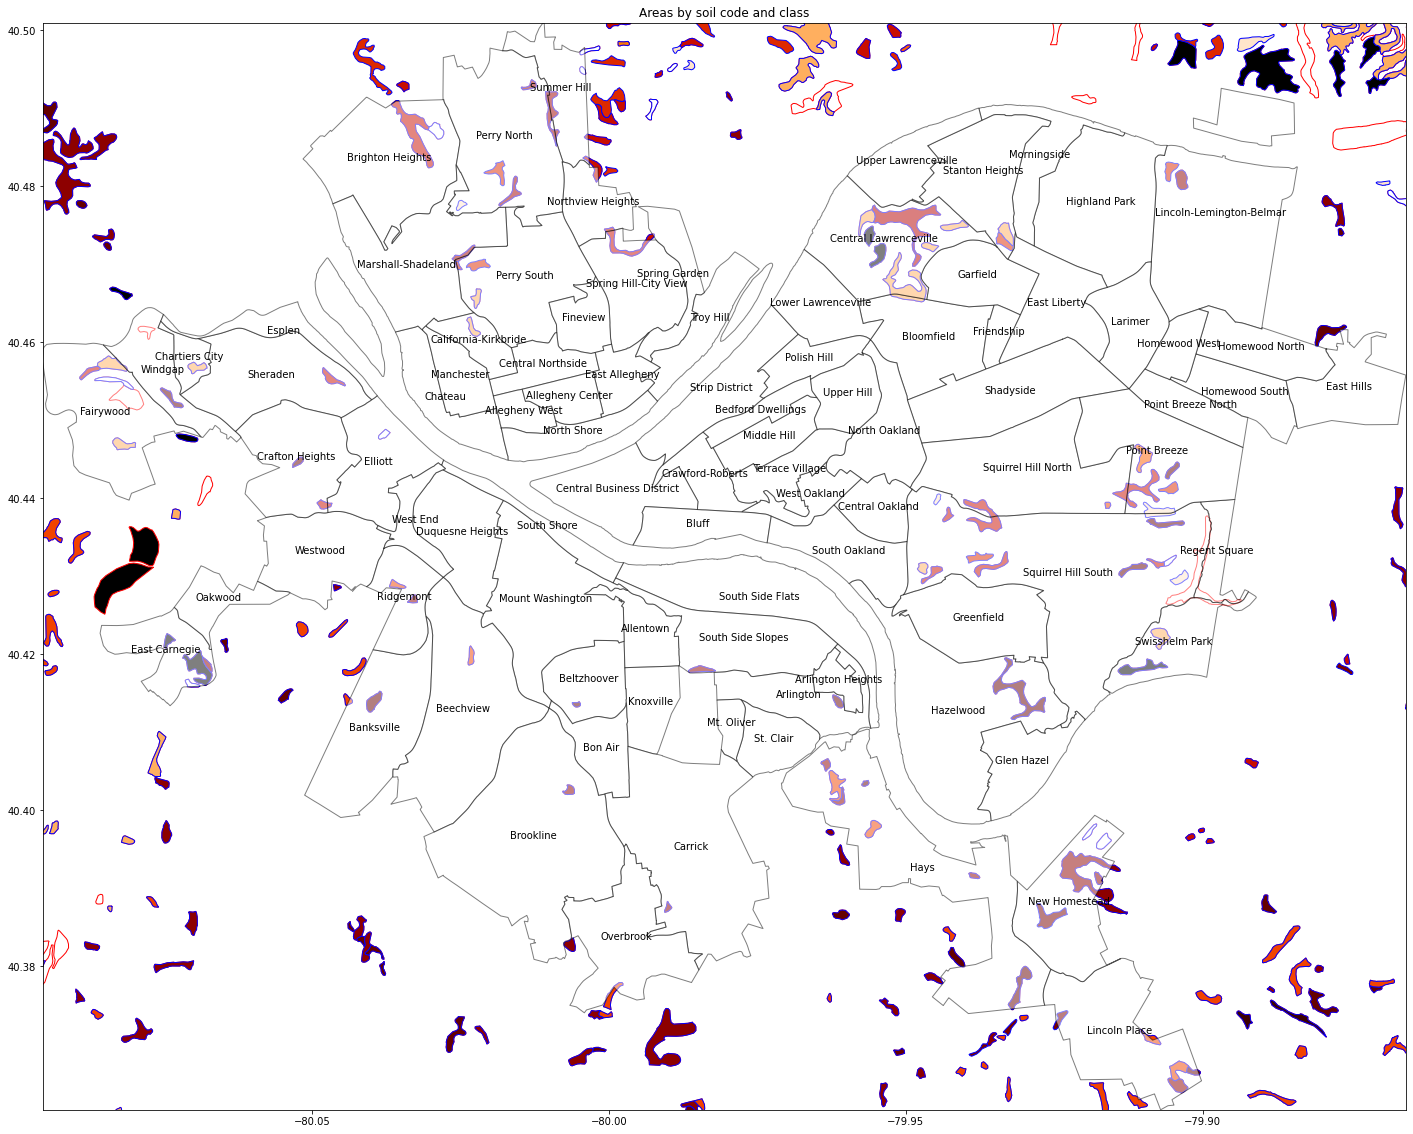

In [129]:
map = soilAreas.merge(filteredSoilSet)
map2 = soilAreas.merge(filteredSoilSet2)
neighborhoodMap = neighborhoods
fig, ax = plt.subplots(figsize = (30,20))

crs = ("+proj=longlat +datum=WGS84 +no_defs") 
map = map.to_crs(crs=crs) 
map2 = map2.to_crs(crs=crs)

for data in neighborhoodMap.groupby('hood'):
    color = 'white'

map.plot(column = 'CLASS', cmap = 'gist_heat', edgecolor = 'red', ax = ax)
map2.plot(column = 'SOIL_CODE', cmap = 'gist_heat', edgecolor = 'blue', ax = ax)
nmap = neighborhoodMap.plot(color = color, ax = ax, alpha = 0.5, edgecolor = 'black')
neighborhoodMap.apply(lambda x: nmap.annotate(s=x.hood, xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

ax.set_ylim([40.36161042, 40.50096594])
ax.set_xlim([-80.09533686, -79.86577284])
ax.set(title = "Areas by soil code and class")
plt.show()

## The Best Neighborhood
After plotting the best class and soil data, we can conclude the following rankings:
1: Central Lawrenceville
2: Squirrel Hill Gouth
3: Point Breeze
4: New Homestead

## Conclusion
We have found that Central Lawrenceville is the best neighborhood. Personally, I can understand, as the area does have a large soil area and a health ecosystem, however my idea on the best neighborhood would be Squirell Hill. Squirell Hill contains a lot of schenley park, which is also my favorite Pittsburgh park. Schenley Park  is mostly void of urban development, and has a lot of great potential if you were a plant. Clearly this area is best for plant-life